In [20]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


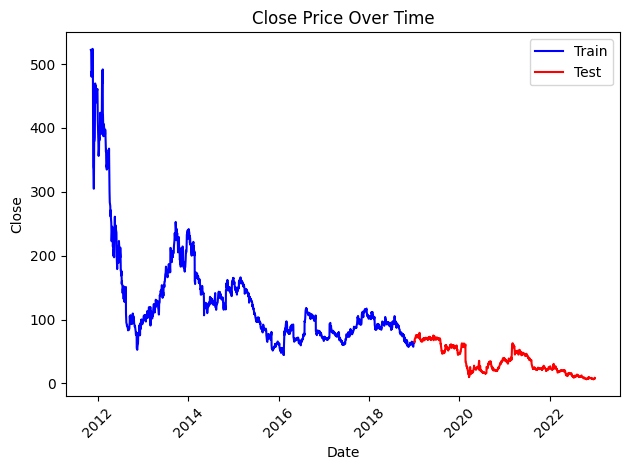

In [2]:
#GROUPON 
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GRPN',start_date,end_date,period,2019)
data.data_preprocess()

In [3]:
data.data_period = "train"
print("Train period:")
data.comparison_metrics()
data.buy_and_hold()
print("\n")
data.data_period = "test"
print("Test period:")
data.comparison_metrics()
data.buy_and_hold()

Train period:
Return: -0.6900656901919597
Portfolio MDD: 0.8256766999743
Portfolio Std Dev: 0.16143984200666853
Buy and Hold Strategy Profit: -0.82.
Buy and Hold Strategy MDD   : 0.84.


Test period:
Return: -0.8270424570068216
Portfolio MDD: 1.0712733510658738
Portfolio Std Dev: 0.22813863132504142
Buy and Hold Strategy Profit: -0.89.
Buy and Hold Strategy MDD   : 0.90.


In [27]:
data.strategy_performance().head(5)

,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,TS11,TS12
0,0.156442,0.156442,0.156442,0.156442,0.156442,0.000000,0.156442,0.156442,0.0,0.156442,0.156442,0.000000
1,-0.134921,-0.134921,-0.134921,-0.134921,-0.174242,0.000000,-0.134921,-0.174242,0.0,-0.134921,-0.134921,-0.091667
2,0.017341,0.044510,0.044510,0.044510,-0.002833,0.044510,-0.008451,-0.002833,0.0,0.044510,0.044510,0.044510
3,-0.030220,-0.030220,-0.030220,-0.030220,-0.030220,0.008571,-0.030220,-0.030220,0.0,-0.030220,-0.030220,0.038235
4,-0.102564,-0.102564,-0.102564,-0.160000,-0.160000,-0.068047,-0.102564,-0.160000,0.0,-0.102564,-0.102564,-0.102564


Running ring
Generation 1: Best fitness = 1.872684709455846  Average Fitness = 0.21541569598297367
Generation 2: Best fitness = 2.07302387511787  Average Fitness = 0.42882585108152105
Generation 3: Best fitness = 2.590569952792519  Average Fitness = 0.6379122294036272
Generation 4: Best fitness = 2.590569952792519  Average Fitness = 0.8241549235979507
Generation 5: Best fitness = 2.590569952792519  Average Fitness = 0.9178735600540022
Generation 6: Best fitness = 3.057450500659275  Average Fitness = 1.028275242944044
Generation 7: Best fitness = 3.057450500659275  Average Fitness = 1.2365720547936703
Generation 8: Best fitness = 5.393308605452829  Average Fitness = 1.4121345253085076
Generation 9: Best fitness = 5.393308605452829  Average Fitness = 1.479676751741151
Generation 10: Best fitness = 5.393308605452829  Average Fitness = 1.567032962138926
Island 0 Migration -Left island 9 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Island 2 Migration -Left island 1 -Rig

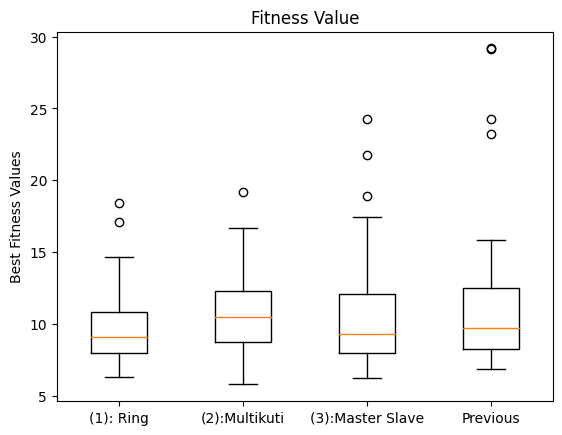

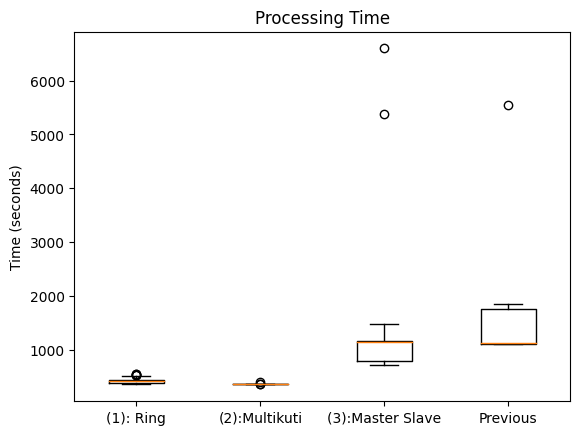

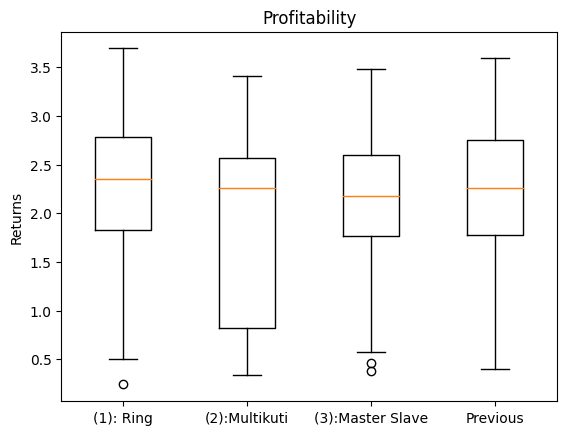

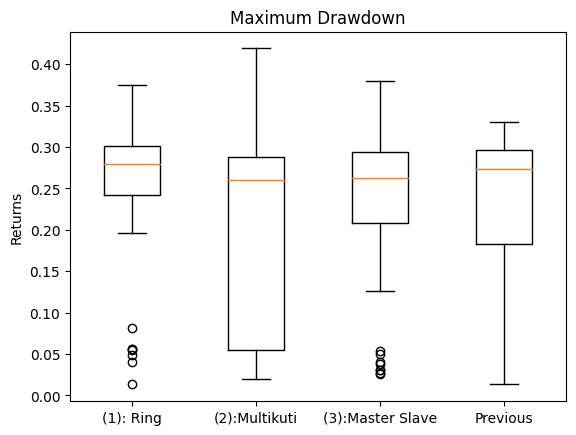

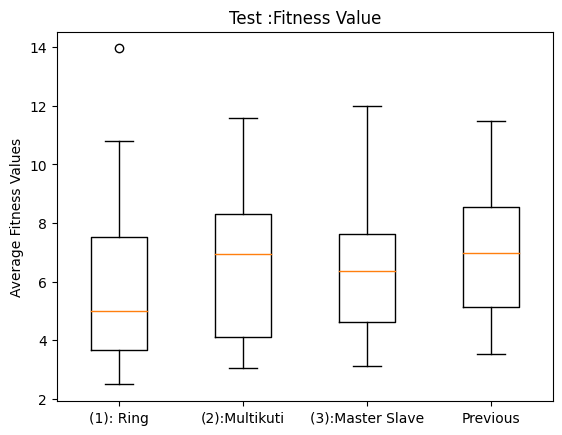

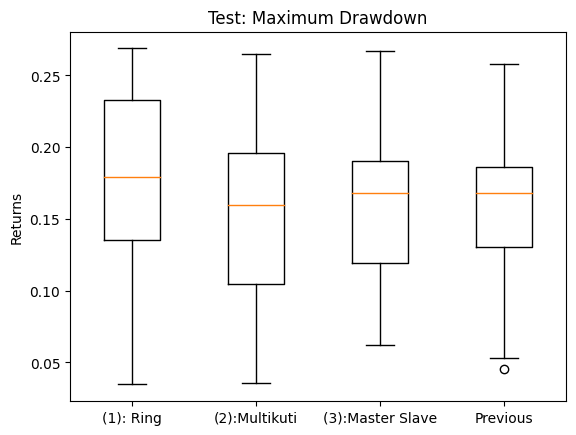

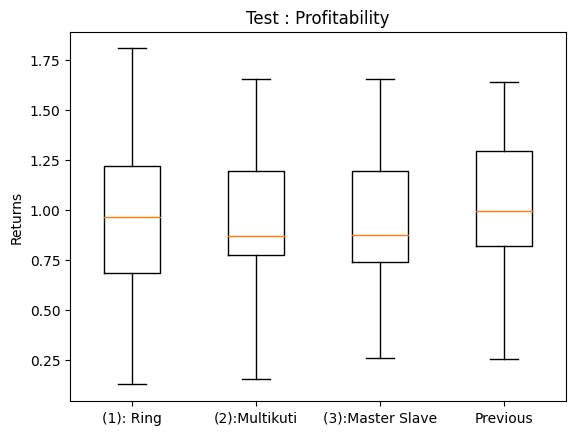

In [4]:
#total return training 
import matplotlib.pyplot as plt

fitness_values = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_fitness_values = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
speed_values =  {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
mdd = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_mdd = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
evolve_strategy =["ring", "multikuti","master_slave","gga"]

for i in evolve_strategy:
    for j in range(40):
        start = time.time()
        ga = IslandGGA(data=data.train_data,K=4,num_islands=10,m_iter=10,num_iter=50,pSize=150,r_cross=0.4,r_mut=0.1,strategies=data.top_strategy_names,evolve_strategy=i)
        ga.evolve()
        end = time.time()
        processing_time=end - start
        speed_values[i].append(processing_time)
        ### USE TRAIN DATA? 
        fitness_values[i].append(ga.globalBest.fitness_value)
        profit[i].append(ga.globalBest.profit)
        mdd[i].append(ga.globalBest.mdd)
        ### USE TEST DATA HERE? 
        ga.globalBest.calculate_chromosome_fitness(data.test_data,1)
        test_fitness_values[i].append(ga.globalBest.fitness_value)
        test_profit[i].append(ga.globalBest.profit)
        test_mdd[i].append(ga.globalBest.mdd)



# Combine the fitness data into a list
fitness_data = [fitness_values[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Best Fitness Values')

# Set the title of the plot
ax.set_title('Fitness Value')

# Show the plot
plt.show()



#### TIME PLOT
# Combine the time data into a list
speed_data = [speed_values[i] for i in  evolve_strategy]

# Create a time box plot
fig, ax = plt.subplots()
ax.boxplot(speed_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Time (seconds)')

# Set the title of the plot
ax.set_title('Processing Time')

# Show the plot
plt.show()



#### profit
# Combine the profit data into a list
profit_data = [profit[i] for i in  evolve_strategy]

# Create a profit box plot
fig, ax = plt.subplots()
ax.boxplot(profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Profitability')

# Show the plot
plt.show()


#### mdd
# Combine the risk data into a list
mdd_data = [mdd[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(mdd_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('MDD')

# Set the title of the plot
ax.set_title('Maximum Drawdown')

# Show the plot
plt.show()


# Combine the test fitness data into a list
test_fitness_data = [test_fitness_values[i] for i in  evolve_strategy]
# Create a test fitness box plot
fig, ax = plt.subplots()
ax.boxplot(test_fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Average Fitness Values')

# Set the title of the plot
ax.set_title('Test :Fitness Value')
# Show the plot
plt.show()


#### test mdd
# Combine the risk data into a list
test_mdd_data = [test_mdd[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(test_mdd_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('MDD')

# Set the title of the plot
ax.set_title('Test: Maximum Drawdown')

#### profit
# Combine the profit data into a list
test_profit_data = [test_profit[i] for i in  evolve_strategy]

# Create a test profit box plot
fig, ax = plt.subplots()
ax.boxplot(test_profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['(1): Ring', '(2):Multikuti','(3):Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Test : Profitability')

# Show the plot
plt.show()

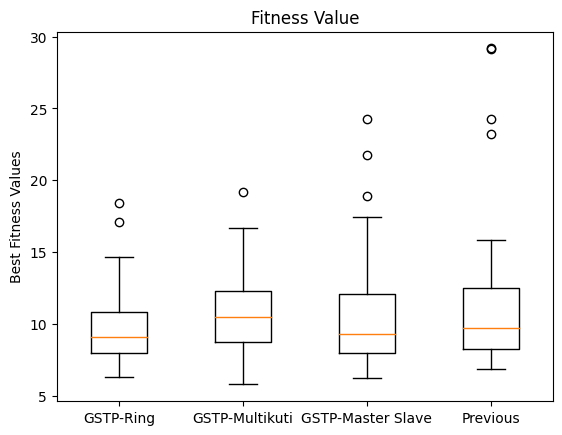

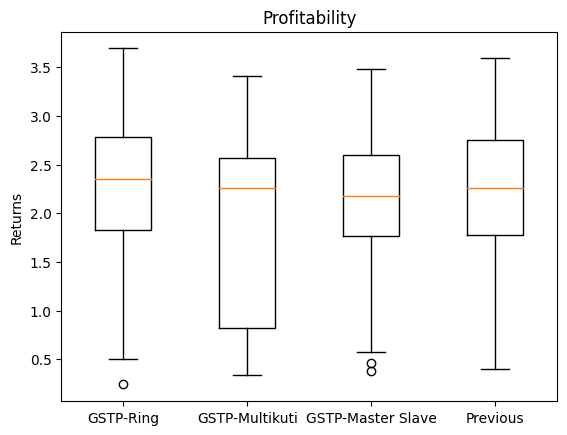

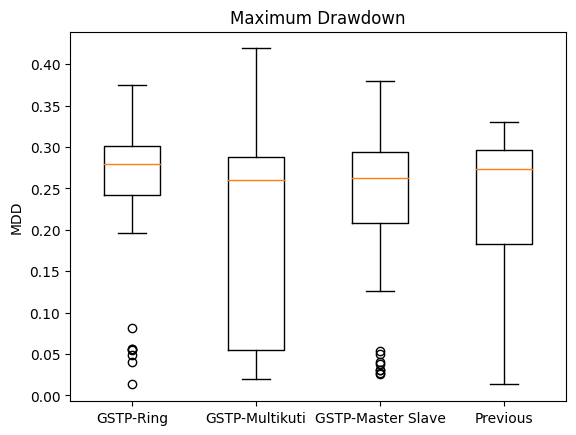

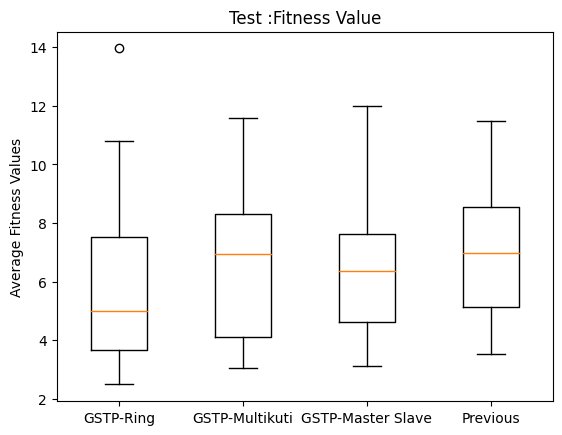

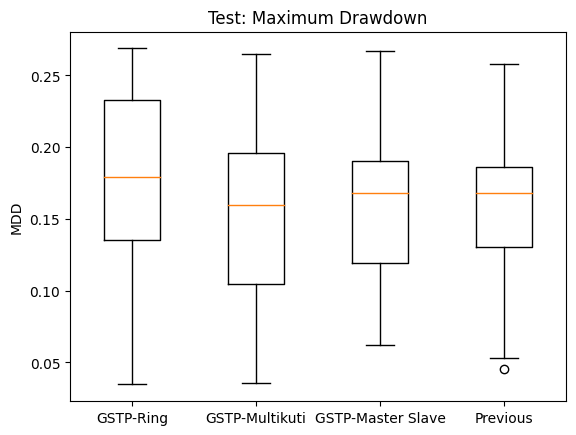

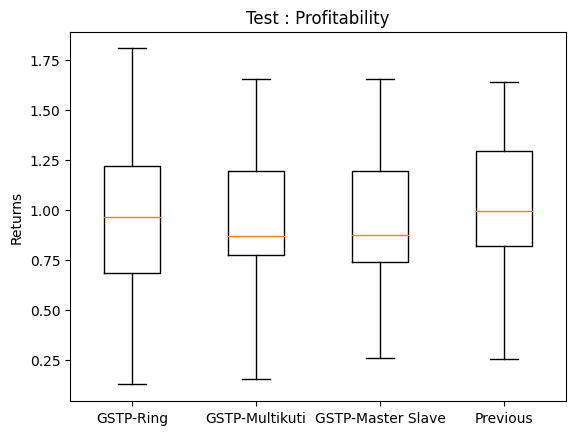

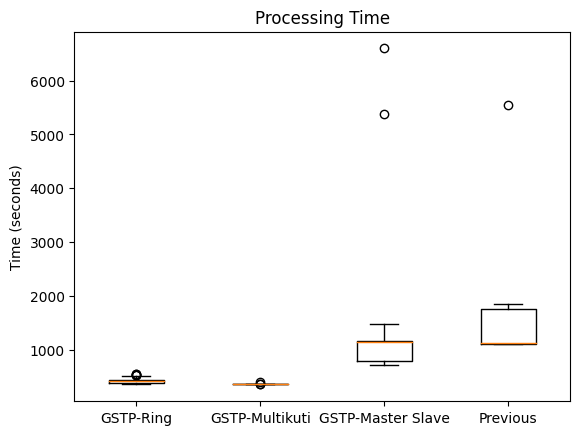

In [25]:

# Combine the fitness data into a list
fitness_data = [fitness_values[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Best Fitness Values')

# Set the title of the plot
ax.set_title('Fitness Value')

# Show the plot
plt.show()




#### profit
# Combine the profit data into a list
profit_data = [profit[i] for i in  evolve_strategy]

# Create a profit box plot
fig, ax = plt.subplots()
ax.boxplot(profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Profitability')

# Show the plot
plt.show()


#### mdd
# Combine the risk data into a list
mdd_data = [mdd[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(mdd_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('MDD')

# Set the title of the plot
ax.set_title('Maximum Drawdown')

# Show the plot
plt.show()


# Combine the test fitness data into a list
test_fitness_data = [test_fitness_values[i] for i in  evolve_strategy]
# Create a test fitness box plot
fig, ax = plt.subplots()
ax.boxplot(test_fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Average Fitness Values')

# Set the title of the plot
ax.set_title('Test :Fitness Value')
# Show the plot
plt.show()


#### test mdd
# Combine the risk data into a list
test_mdd_data = [test_mdd[i] for i in  evolve_strategy]

# Create a risk box plot
fig, ax = plt.subplots()
ax.boxplot(test_mdd_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Return')

# Set the title of the plot
ax.set_title('Test: Maximum Drawdown')

#### profit
# Combine the profit data into a list
test_profit_data = [test_profit[i] for i in  evolve_strategy]

# Create a test profit box plot
fig, ax = plt.subplots()
ax.boxplot(test_profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Returns')

# Set the title of the plot
ax.set_title('Test : Profitability')

# Show the plot
plt.show()
# Combine the time data into a list
speed_data = [speed_values[i] for i in  evolve_strategy]

# Create a time box plot
fig, ax = plt.subplots()
ax.boxplot(speed_data)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Time (seconds)')

# Set the title of the plot
ax.set_title('Processing Time')

# Show the plot
plt.show()

In [41]:
df = pd.DataFrame(speed_data).T
df.columns = evolve_strategy
df.describe().round(3)

,ring,multikuti,master_slave,gga
count,40.000,40.000,40.000,40.000
mean,421.823,360.124,1248.187,1413.893
std,56.513,7.452,1127.665,733.362
min,353.005,356.090,719.324,1103.152
25%,378.138,357.451,785.655,1111.672
50%,417.418,358.593,1143.960,1119.407
75%,438.823,359.960,1151.708,1761.732
max,540.720,403.584,6596.369,5547.607


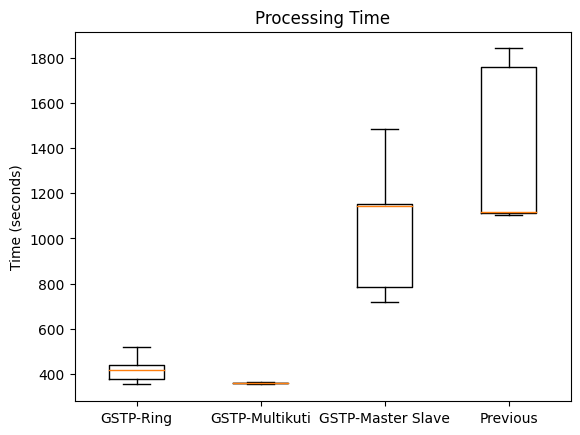

In [43]:
# Combine the time data into a list
speed_data = [speed_values[i] for i in  evolve_strategy]

# Create a time box plot plt.boxplot(data, showfliers=False)
fig, ax = plt.subplots()
ax.boxplot(speed_data,showfliers=False)

# Set the x-axis tick labels
ax.set_xticklabels(['GSTP-Ring', 'GSTP-Multikuti','GSTP-Master Slave','Previous'])

# Set the y-axis label
ax.set_ylabel('Time (seconds)')

# Set the title of the plot
ax.set_title('Processing Time')

# Show the plot
plt.show()

In [37]:
from scipy import stats

# Compare the  metrics of  two algorithms
t_statistic, p_value = stats.ttest_ind(test_profit_data[0], test_profit_data[3])

# Print the results
if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference  is not statistically significant.")
print(p_value)

The difference  is not statistically significant.
0.35776021235342625
